# Brightness metric idea notebook

In [1]:
# Import statements
from imageio import imread, imwrite
from pylab import *
from skimage.util import img_as_ubyte, img_as_float
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import scripts.BP_ratio as bp
import scripts.motion_blur as mb
import scripts.dataset_plotting as dp
from matplotlib.pyplot import imshow
from copy import copy
import os 
import sys
# Import local code
bachelorpath = os.path.normpath(os.getcwd() + os.sep + os.pardir)
scriptpath = bachelorpath + '/scripts/'
sys.path.insert(0, scriptpath)
import BP_ratio as bp
import dataset_plotting as dp
import motion_blur as mb 

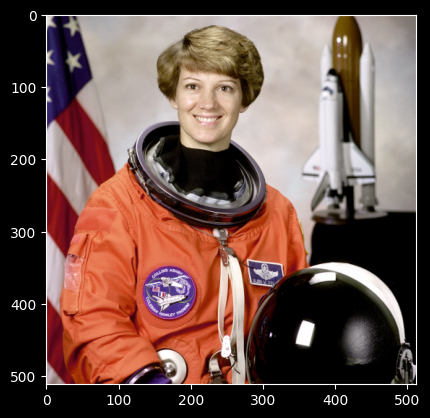

In [2]:
image = imread('Images/astronaut.png')
imshow(image)

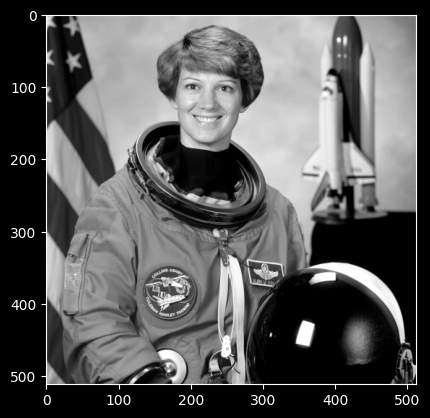

In [3]:
# Convert to grayscale 
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imshow(gray_image, cmap='gray')

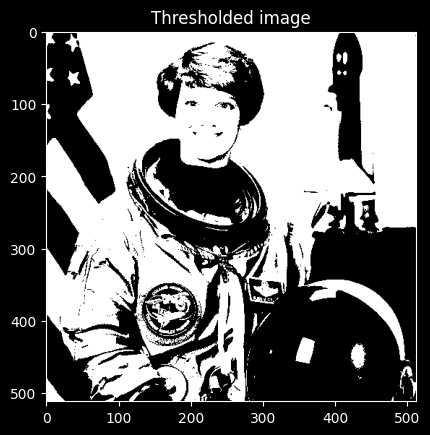

In [4]:
# Compute average intensity of each pixel:
avg = gray_image.mean()
# Create thresholded picture. To take either 0 or 255 in pixel value.
imbw = gray_image>avg# threshold the image
imbw = img_as_ubyte(imbw)
imshow(imbw, cmap='gray')
title('Thresholded image')
show()

## Thresholded image brightness metric
It is possible to treat this binary image as a form of extracted version of which pixels are above the mean in brightness and which are not therefore we can try to calculate the following:

Here we assume that $p_{ij}$ is the pixel value at index i,j.

$$
    BP = \sum^N_{i=0} \sum^M_{j=0} b(i,j)
$$
Where we have such that:
$$
b(i,j) =
\begin{cases}
    1 \text{ if } p_{ij} = 255 \\
    0 \text{ if } p_{ij} = 0
    \end{cases}
$$

And for DP or dim pixels we have such that:
$$
    DP = \sum^N_{i=0} \sum^M_{j=0} d(i,j)
$$
Where 
$$
d(i,j) =
\begin{cases}
    1 \text{ if } p_{ij} = 0 \\
    0 \text{ if } p_{ij} = 255
    \end{cases}
$$

This gives us the total amount of binary pixels above average in gray scale, where we can the calculate the percentages of image begin a "dim" or "bright" pixel. Or calculate the ratio $p_r$ as:

$$
p_r = \frac{BP}{DP} 
$$

In [5]:
# Calculate ratio of white pixels vs black pixels in scene:
brightPixCounter = 0
dimPixCounter = 0
imbw_flt = copy(imbw)
imbw_flt.flatten()

for i in imbw_flt:
    for j in i:
        if j == 255:
            brightPixCounter += 1
        else:
            dimPixCounter += 1
        
        
print("Number of Bright pixels: ",brightPixCounter)
print("Number of Dim Pixels: ",dimPixCounter)
print("Total number of pixels in image: ", imbw.size)
print("Percentage of Bright Pixels: ", brightPixCounter/imbw.size * 100)
print("Percentage of Dim Pixels: ", dimPixCounter/imbw.size * 100)
print("Pixel ratio is: ", brightPixCounter/dimPixCounter)

Number of Bright pixels:  147939
Number of Dim Pixels:  114205
Total number of pixels in image:  262144
Percentage of Bright Pixels:  56.43424987792969
Percentage of Dim Pixels:  43.56575012207031
Pixel ratio is:  1.2953811129109933


### Test on EuRoC

In [6]:
euroc_metrics = bp.load_euroc_dataset(True)

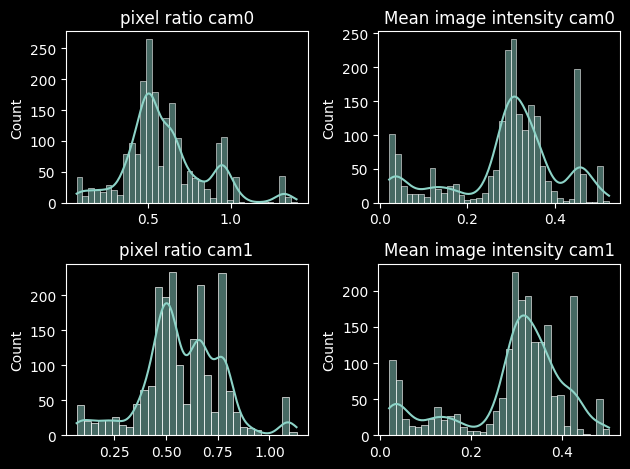

In [7]:
data_br, data_m = euroc_metrics
bp.create_histogram_euroc(euroc_metrics)

In [8]:
bp.print_euroc_metrics(euroc_metrics, False)

Combined pixel ratio of both cams:  0.5876262137959041
Combined pixel ratio variance on both cams:  0.047738362714971144
Combined mean image intensity of both cams:  0.29254910349845886
Combined mean image intensity variance of both cams:  0.025591942423412346


# Testing HSV and YUV


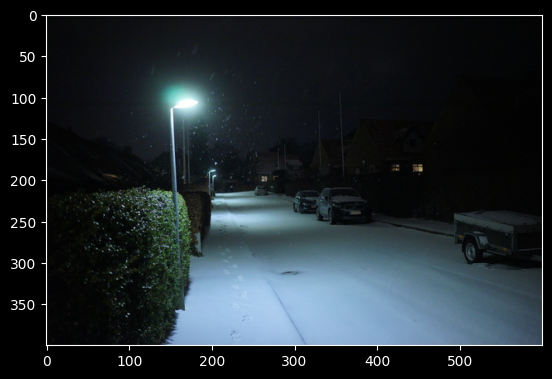

In [9]:
maden = imread('Images/Maden.jpg')
imshow(maden)

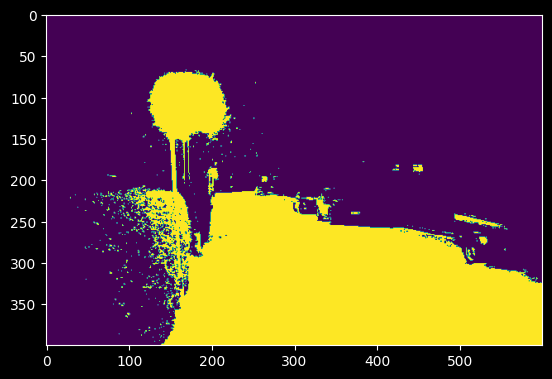

In [10]:
b, d, mdbw = bp.colorspace_threshold_image(maden, "HSV", True)
imshow(mdbw)

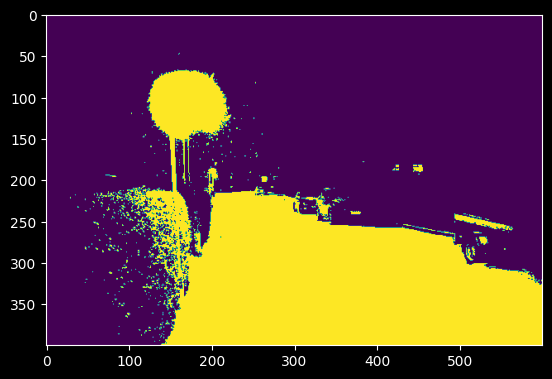

In [12]:
b2, d2, mdbw2 = bp.threshold_image(maden, True)
imshow(mdbw2)

In [17]:
d2-d

-938